**IMPORTING REQUIRED MODULES**

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**READING THE DATA FRAME**

In [140]:
data= pd.read_csv("/Users/sri/Downloads/Missing_Migrants_Global_Figures_allData_0.csv")

In [141]:
data.shape

(13370, 25)

**CHECK FOR MISSING VALUES AND DATASET INFO**

In [142]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13370 entries, 0 to 13369
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Main ID                              13370 non-null  object 
 1   Incident ID                          13370 non-null  object 
 2   Incident Type                        13370 non-null  object 
 3   Region of Incident                   13370 non-null  object 
 4   Website Date                         13355 non-null  object 
 5   Incident year                        13370 non-null  int64  
 6   Reported Month                       13370 non-null  object 
 7   Number of Dead                       12772 non-null  float64
 8   Minimum Estimated Number of Missing  1360 non-null   float64
 9   Total Number of Dead and Missing     13370 non-null  int64  
 10  Number of Survivors                  2169 non-null   float64
 11  Number of Females           

In [143]:
data.head()

,Main ID,Incident ID,Incident Type,Region of Incident,Website Date,Incident year,Reported Month,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,...,Cause of Death,Country of Origin,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Article title,Source Quality,URL
0,2014.MMP00001,2014.MMP00001,Incident,North America,2014-01-06,2014,January,1.0,NaN,1,...,Mixed or unknown,Guatemala,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,NaN,5.0,http://humaneborders.info/
1,2014.MMP00002,2014.MMP00002,Incident,North America,2014-01-12,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
2,2014.MMP00003,2014.MMP00003,Incident,North America,2014-01-14,2014,January,1.0,NaN,1,...,Mixed or unknown,Unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,Undocumented Border Crossers 01/01/2014-08/29/...,5.0,NaN
3,2014.MMP00004,2014.MMP00004,Incident,North America,2014-01-16,2014,January,1.0,NaN,1,...,Violence,Mexico,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America,Mexico condemns the use of force by a border p...,5.0,http://bit.ly/1qfIw00
4,2014.MMP00005,2014.MMP00005,Incident,Europe,2014-01-16,2014,January,1.0,0.0,1,...,Harsh environmental conditions / lack of adequ...,Sudan,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe,Sudanese migrant freezes to death in illegal E...,1.0,http://bit.ly/1rTFTjR


In [144]:
data.describe()

,Incident year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,13370.000000,12772.000000,1360.000000,13370.000000,2169.000000,2413.000000,8241.000000,1619.000000,13369.000000
mean,2019.162528,2.632242,18.689706,4.415632,40.311203,2.533775,1.829390,1.958616,3.252973
std,2.466529,9.656239,45.177396,19.747754,97.348745,6.247072,4.745209,6.612543,1.369182
min,2014.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,1.000000
25%,2017.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000
50%,2019.000000,1.000000,6.000000,1.000000,13.000000,1.000000,1.000000,1.000000,4.000000
75%,2021.000000,2.000000,17.000000,2.000000,38.000000,2.000000,1.000000,2.000000,4.000000
max,2023.000000,750.000000,750.000000,1022.000000,1950.000000,94.000000,135.000000,250.000000,5.000000


**DATA CLEANING AND IMPUTING MISSING VALUES**

In [145]:

numeric_columns = ['Minimum Estimated Number of Missing','Number of Survivors', 'Number of Females', 'Number of Children']
data[numeric_columns] = data[numeric_columns].fillna(0)

data['Migration route'].fillna('Not specified', inplace=True)
data['Information Source'].fillna('Not available', inplace=True)

In [146]:
#Dropping 
columns_to_drop =['URL','Article title','Location of death']
data.drop(columns=columns_to_drop, inplace=True)

In [147]:
columns_to_check = [ 'Website Date','Source Quality','Region of Origin','Country of Origin','Coordinates','UNSD Geographical Grouping']
df_cleaned_specific = data.dropna(subset=columns_to_check,inplace=True)

In [148]:
data['Number of Dead'].fillna(data['Number of Dead'].median(), inplace=True)
data['Number of Males'].fillna(data['Number of Males'].median, inplace=True)

In [149]:
data.isnull().sum()

Main ID                                0
Incident ID                            0
Incident Type                          0
Region of Incident                     0
Website Date                           0
Incident year                          0
Reported Month                         0
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Region of Origin                       0
Cause of Death                         0
Country of Origin                      0
Migration route                        0
Information Source                     0
Coordinates                            0
UNSD Geographical Grouping             0
Source Quality                         0
dtype: int64

In [150]:
def calculate_survival_rate(dataframe):
    total_incidents = len(dataframe)
    total_survivors = dataframe['Number of Survivors'].sum()
    total_dead_missing = dataframe['Total Number of Dead and Missing'].sum()

    survival_rate = total_survivors / (total_survivors + total_dead_missing)
    
    return survival_rate

# Assuming your DataFrame is named 'df'
survival_rate = calculate_survival_rate(data)
print("Survival Rate: {:.2%}".format(survival_rate))

Survival Rate: 59.75%


In [151]:

def calculate_percent_dead(row):
   
    total_casualties = row['Total Number of Dead and Missing']
    if total_casualties is not None and total_casualties > 0:
        return (row['Number of Dead'] / total_casualties) * 100

    return None

def add_percent_dead_column(data):
    data['Percent Dead'] = data.apply(calculate_percent_dead, axis=1)

    return data

data_with_percent_dead = add_percent_dead_column(data)

print(data_with_percent_dead[['Number of Dead', 'Total Number of Dead and Missing', 'Percent Dead']])


       Number of Dead  Total Number of Dead and Missing  Percent Dead
0                 1.0                                 1    100.000000
1                 1.0                                 1    100.000000
2                 1.0                                 1    100.000000
3                 1.0                                 1    100.000000
4                 1.0                                 1    100.000000
...               ...                               ...           ...
13365             1.0                                 3     33.333333
13366             1.0                                 1    100.000000
13367            18.0                                18    100.000000
13368             1.0                                 1    100.000000
13369             2.0                                 2    100.000000

[13306 rows x 3 columns]


In [152]:
data['Cause of Death'].unique()

array(['Mixed or unknown', 'Violence',
       'Harsh environmental conditions / lack of adequate shelter, food, water',
       'Drowning',
       'Vehicle accident / death linked to hazardous transport',
       'Sickness / lack of access to adequate healthcare',
       'Accidental death', 'Drowning,Mixed or unknown',
       'Drowning,Harsh environmental conditions / lack of adequate shelter, food, water',
       'Drowning,Vehicle accident / death linked to hazardous transport',
       'Harsh environmental conditions / lack of adequate shelter, food, water,Sickness / lack of access to adequate healthcare',
       'Harsh environmental conditions / lack of adequate shelter, food, water,Mixed or unknown',
       'Drowning,Violence',
       'Mixed or unknown,Vehicle accident / death linked to hazardous transport,Violence',
       'Drowning,Sickness / lack of access to adequate healthcare'],
      dtype=object)

**1.Cause of Death**

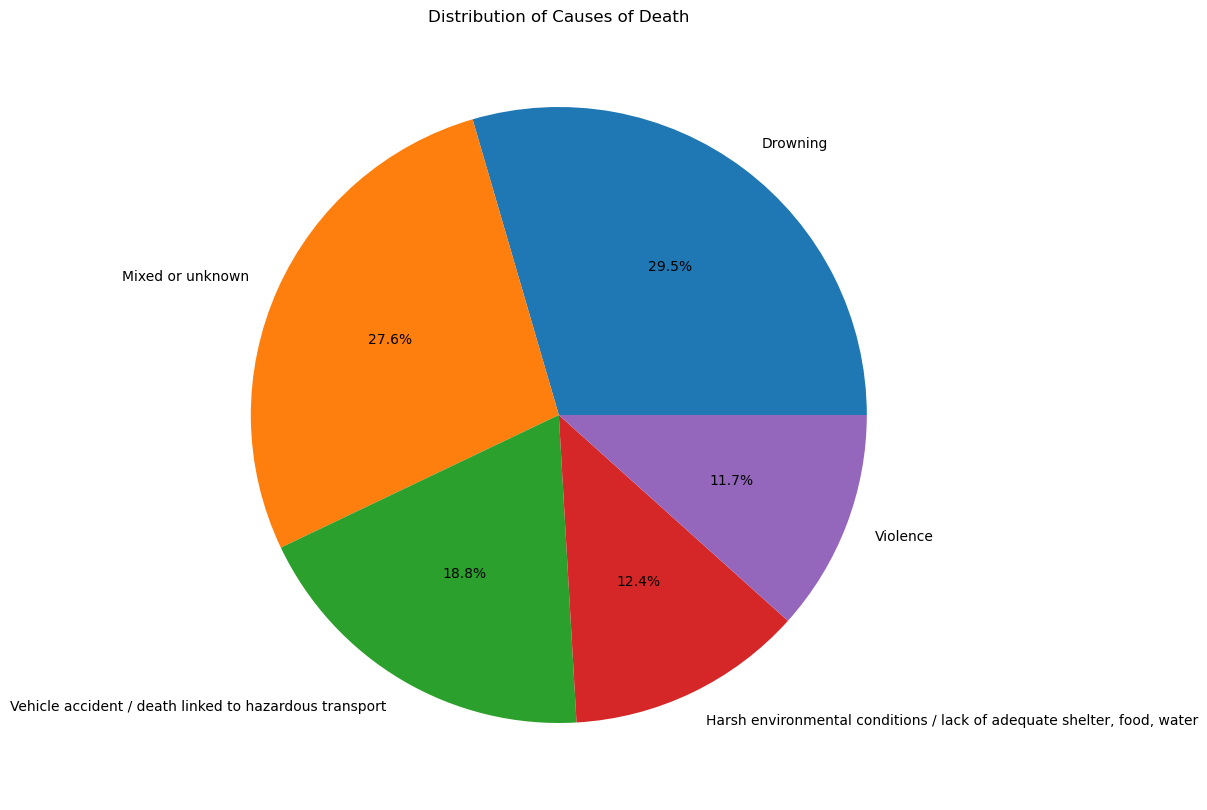

In [164]:
# Pie chart
cause_of_death_counts = data['Cause of Death'].value_counts().head(5)
plt.figure(figsize=(10, 10))
plt.pie(cause_of_death_counts, labels=cause_of_death_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Causes of Death')
plt.show()


**2.Comparison of Dead and Survivors**

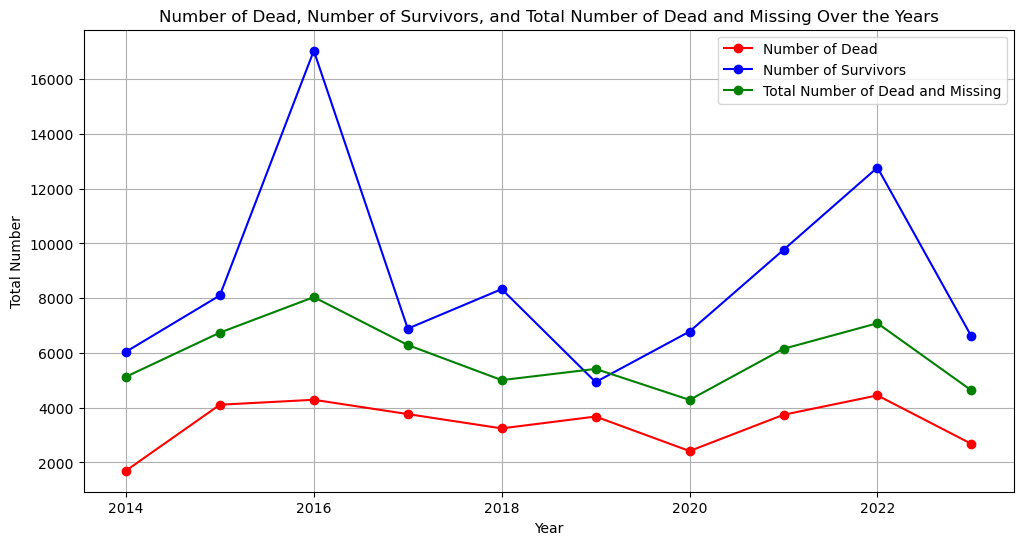

In [154]:

# Group by 'Incident year' and sum the required columns for each year
yearly_totals = data.groupby('Incident year')[['Number of Dead', 'Number of Survivors', 'Total Number of Dead and Missing']].sum()

# Create a line chart
plt.figure(figsize=(12, 6))

# Plot each line
plt.plot(yearly_totals.index, yearly_totals['Number of Dead'], marker='o', label='Number of Dead', color='red')
plt.plot(yearly_totals.index, yearly_totals['Number of Survivors'], marker='o', label='Number of Survivors', color='blue')
plt.plot(yearly_totals.index, yearly_totals['Total Number of Dead and Missing'], marker='o', label='Total Number of Dead and Missing', color='green')

# Add labels and legend
plt.title('Number of Dead, Number of Survivors, and Total Number of Dead and Missing Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number')
plt.legend()
plt.grid(True)
plt.show()


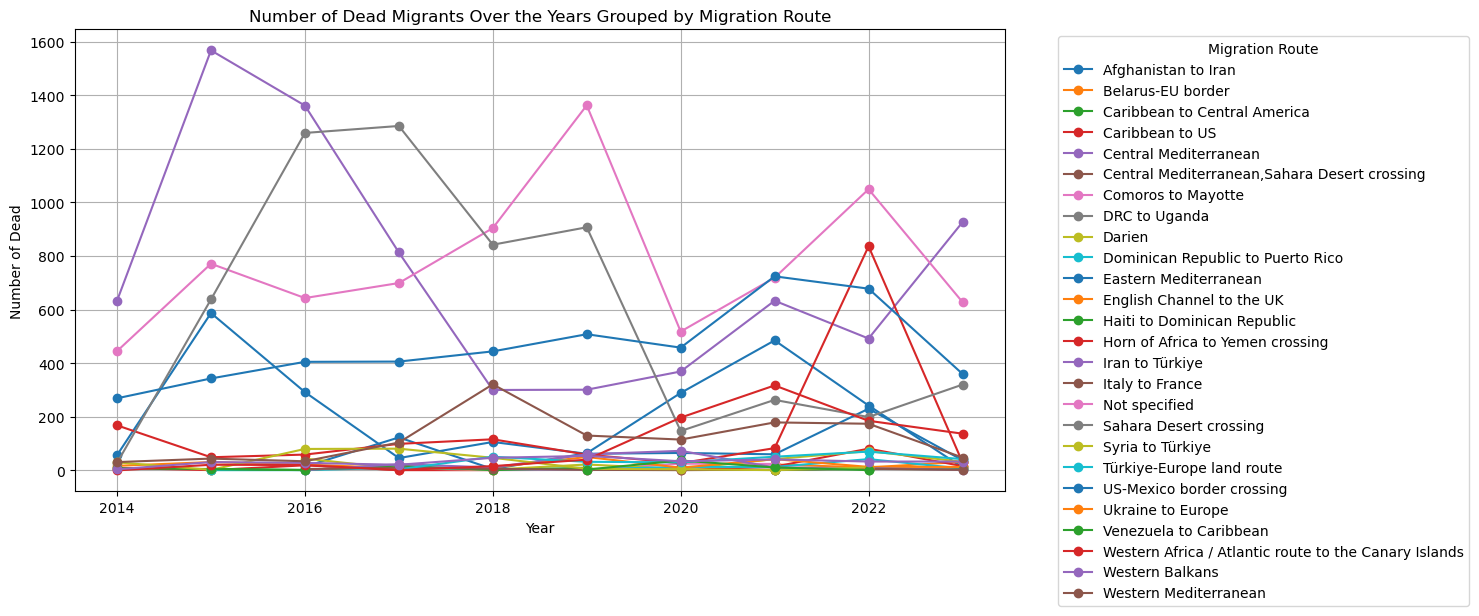

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Group by 'Incident year' and 'Migration route' and sum the 'Number of Dead' for each combination
yearly_route_totals = data.groupby(['Incident year', 'Migration route'])['Number of Dead'].sum().unstack()

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each line for each migration route
for route in yearly_route_totals.columns:
    plt.plot(yearly_route_totals.index, yearly_route_totals[route], marker='o', label=route)

# Add labels and legend
plt.title('Number of Dead Migrants Over the Years Grouped by Migration Route')
plt.xlabel('Year')
plt.ylabel('Number of Dead')
plt.legend(title='Migration Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


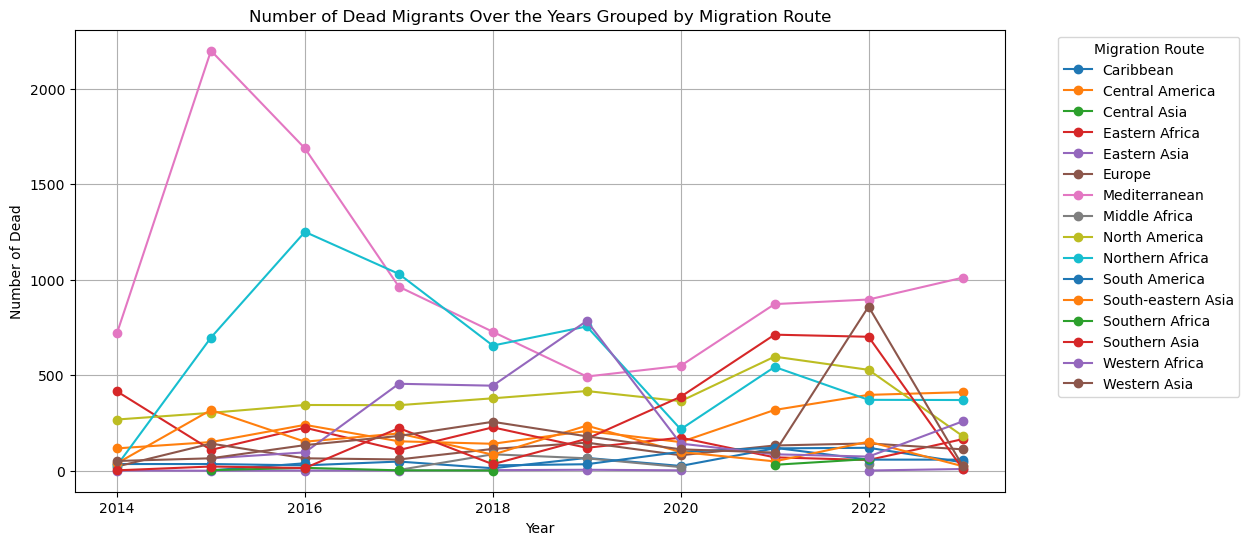

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Group by 'Incident year' and 'Migration route' and sum the 'Number of Dead' for each combination
yearly_route_totals = data.groupby(['Incident year', 'Region of Incident'])['Number of Dead'].sum().unstack()

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot each line for each migration route
for route in yearly_route_totals.columns:
    plt.plot(yearly_route_totals.index, yearly_route_totals[route], marker='o', label=route)

# Add labels and legend
plt.title('Number of Dead Migrants Over the Years Grouped by Migration Route')
plt.xlabel('Year')
plt.ylabel('Number of Dead')
plt.legend(title='Migration Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**3.Most Common Migration ROute**

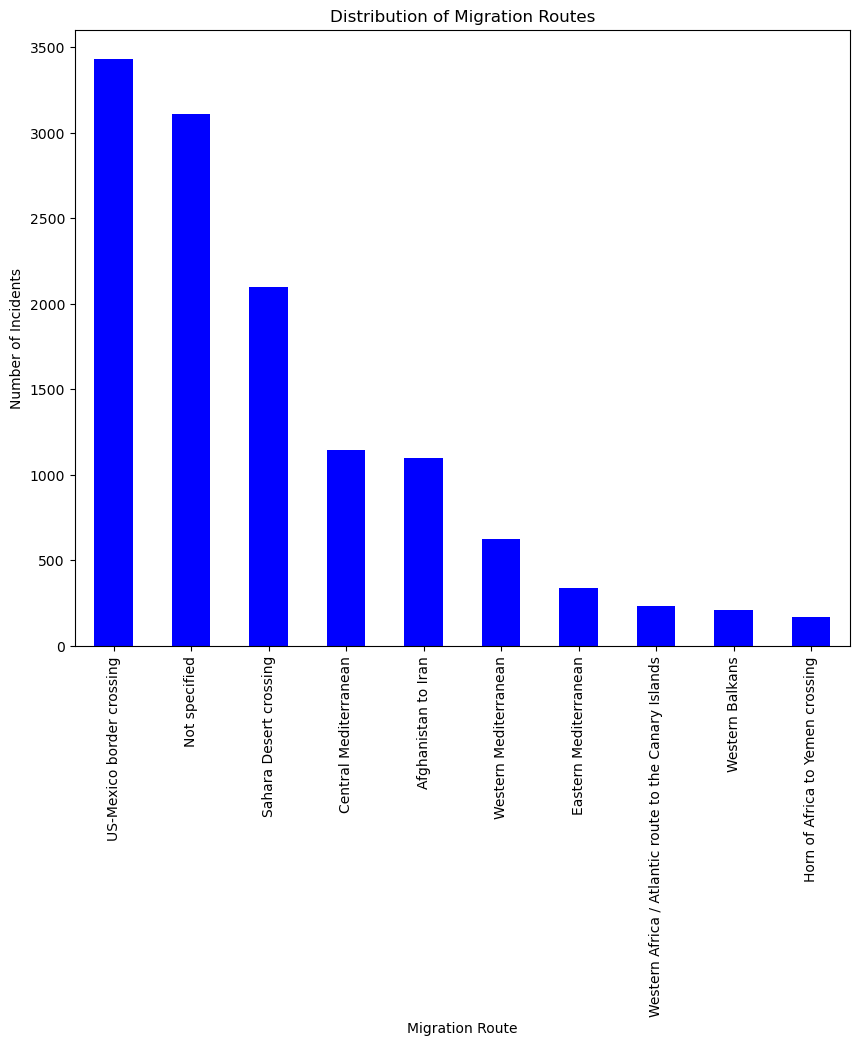

In [157]:
# Horizontal bar chart
migration_route_counts = data['Migration route'].value_counts().head(10)
plt.figure(figsize=(10, 8))
migration_route_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Migration Routes')
plt.xlabel('Migration Route')
plt.ylabel('Number of Incidents')
plt.show()


**4.Deadliest Migration Route**

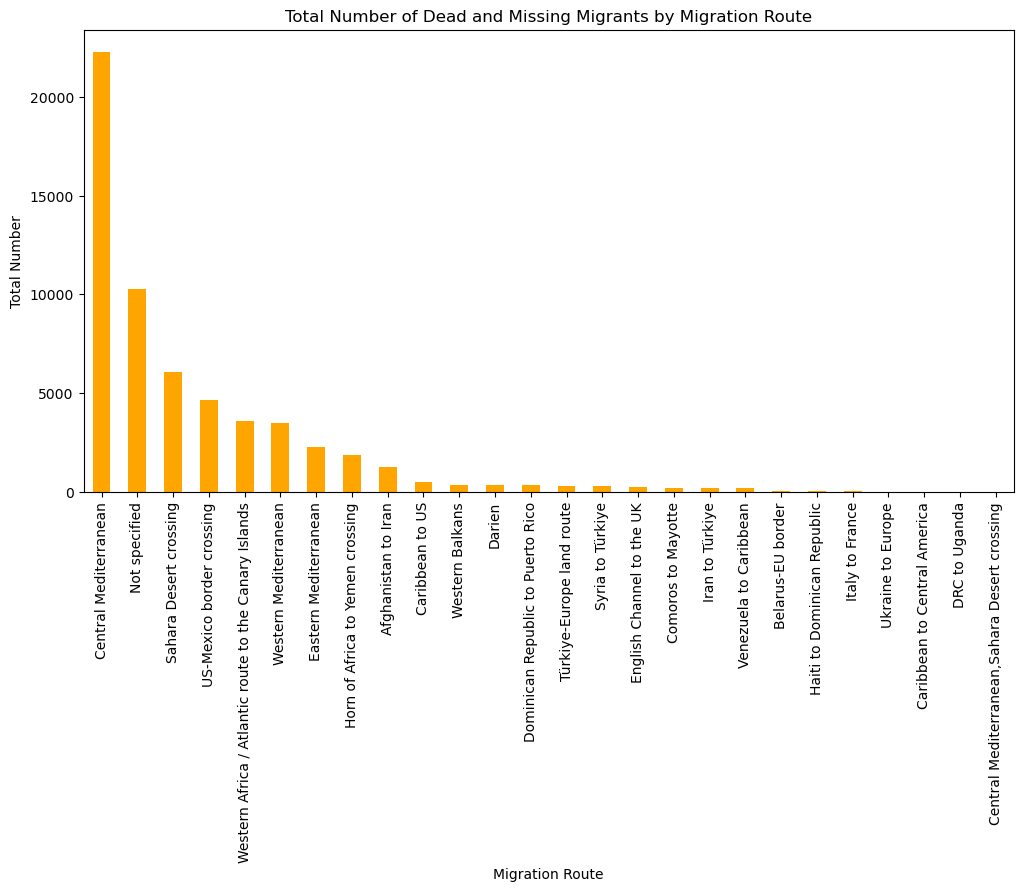

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Group by 'Migration route' and sum the 'Total Number of Dead and Missing'
route_totals = data.groupby('Migration route')['Total Number of Dead and Missing'].sum()

# Sort the routes based on the total number
route_totals = route_totals.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
route_totals.plot(kind='bar', color='orange')
plt.title('Total Number of Dead and Missing Migrants by Migration Route')
plt.xlabel('Migration Route')
plt.ylabel('Total Number')
plt.show()


**4.Region with Highest Number of Missing and dead**

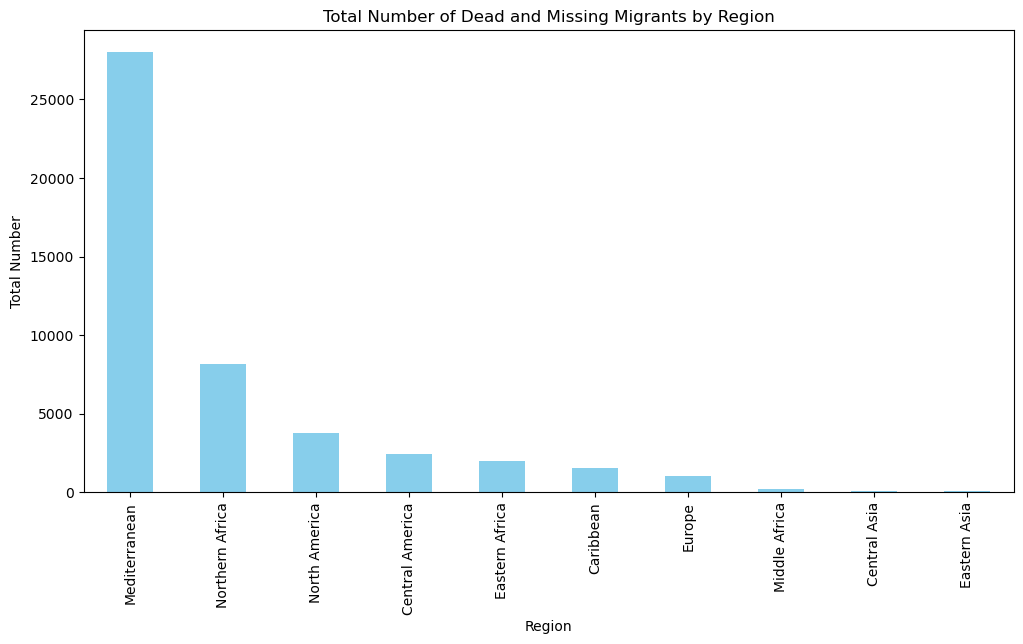

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Group by 'Region of Incident' and sum the 'Total Number of Dead and Missing'
region_totals = data.groupby('Region of Incident')['Total Number of Dead and Missing'].sum().head(10)

# Sort the regions based on the total number
region_totals = region_totals.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
region_totals.plot(kind='bar', color='skyblue')
plt.title('Total Number of Dead and Missing Migrants by Region')
plt.xlabel('Region')
plt.ylabel('Total Number')
plt.show()


**5.Cause of Childrens death**

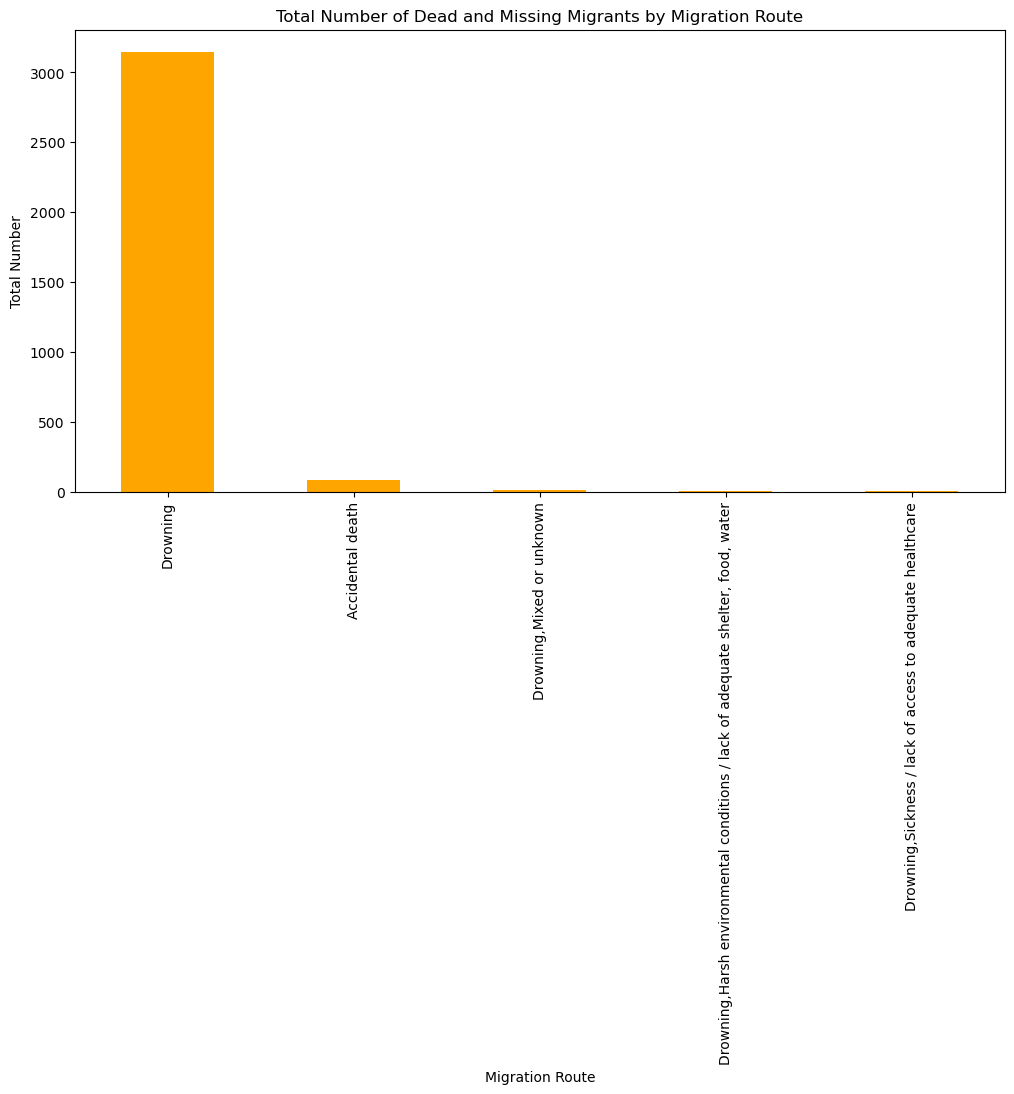

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Group by 'Migration route' and sum the 'Total Number of Dead and Missing'
route_totals = data.groupby('Cause of Death')['Number of Females'].sum().head(5)

# Sort the routes based on the total number
route_totals = route_totals.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
route_totals.plot(kind='bar', color='orange')
plt.title('Total Number of Dead and Missing Migrants by Migration Route')
plt.xlabel('Migration Route')
plt.ylabel('Total Number')
plt.show()


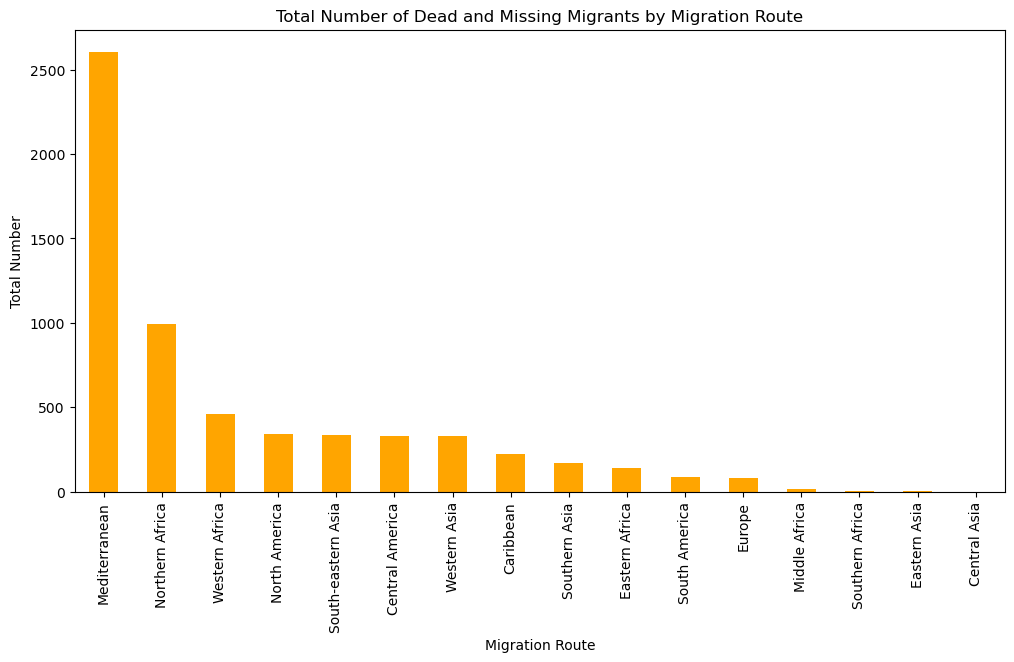

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If not, replace 'df' with the actual name of your DataFrame

# Group by 'Migration route' and sum the 'Total Number of Dead and Missing'
route_totals = data.groupby('Region of Incident')['Number of Females'].sum()

# Sort the routes based on the total number
route_totals = route_totals.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
route_totals.plot(kind='bar', color='orange')
plt.title('Total Number of Dead and Missing Migrants by Migration Route')
plt.xlabel('Migration Route')
plt.ylabel('Total Number')
plt.show()
